In [1]:
# downloads
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Magnu\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

True

In [2]:
import pandas as pd

train_data = pd.read_csv('../fake_news_data/train.csv')
train_data = train_data.set_index('id')
# train_data.head()

test_data = pd.read_csv('../fake_news_data/test.csv')
test_data = test_data.set_index('id')
# test_data.head()

submit = pd.read_csv('../fake_news_data/submit.csv')
submit = submit.set_index('id')
# submit.head()

# train_data['text'][0]

submit.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 20800 to 25999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   5200 non-null   int64
dtypes: int64(1)
memory usage: 81.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 20800 to 25999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5078 non-null   object
 1   author  4697 non-null   object
 2   text    5193 non-null   object
dtypes: object(3)
memory usage: 162.5+ KB


1. We want to make sure the data is clean by removing unused columns, null values etc and then we clean up the text by removing stopword, urls etc.

In [3]:

from nltk.corpus import stopwords
import re

wnl = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#remove null values from train_data
train_data = train_data.dropna()

#remove null values from test_data
test_data = test_data.join(submit)
test_data = test_data.dropna()

In [4]:
def clean_text(text):
    text = str(text).replace(r'http[\w:/.]+', ' ')  # removing urls
    text = str(text).replace(r'[^.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.strip()
    # text = ' '.join(text)
    return text

def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stop_words])
    # text = ' '.join([word for word in wordlist if word not in stop_words])
    return  text
    
# train_data['text'] = train_data['text'].apply(nltk_preprocess)
# test_data['text'] = test_data['text'].apply(nltk_preprocess)
# train_data['title'] = train_data['title'].apply(nltk_preprocess)
# test_data['title'] = test_data['title'].apply(nltk_preprocess)

2. We will use stemming and lemmetization and create a wordcloud for real news and a wordcloud for fake news to demonstrate most common words in fake news vs real news.

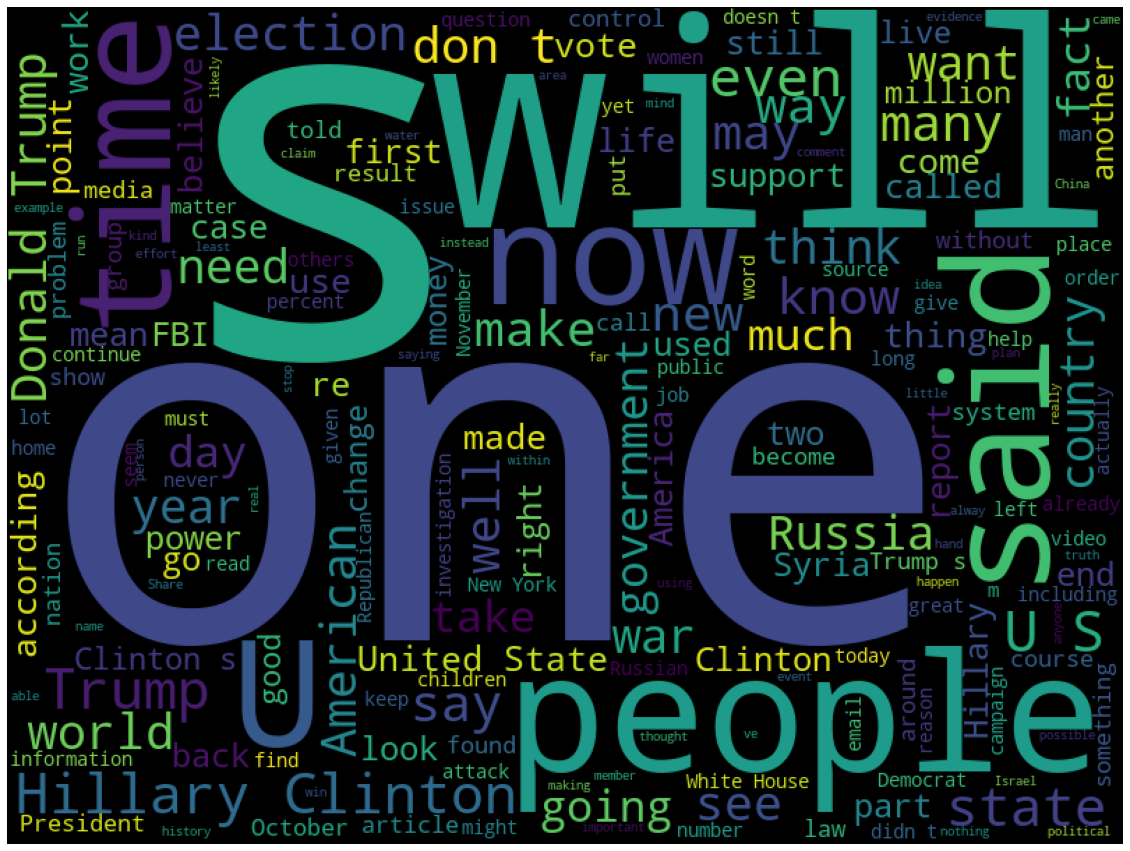

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(background_color='black', width=800, height=600, random_state = 42)
text_cloud = wordcloud.generate(" ".join(train_data['text'].where(train_data['label'] == 1).dropna()))
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()
# " ".join(train_data['text'].where(train_data['label'] == 1).dropna())

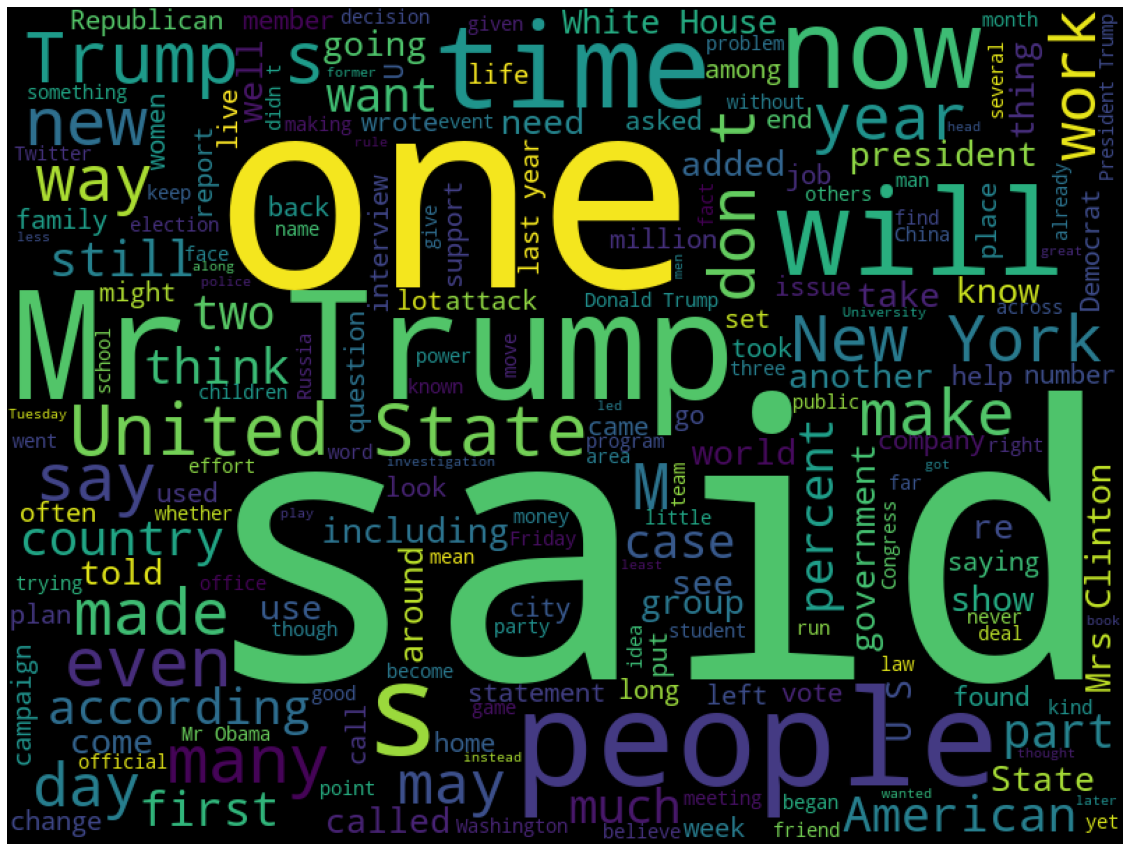

In [6]:
truth_wordcloud = WordCloud(background_color='black', width=800, height=600)
truth_text_cloud = truth_wordcloud.generate(" ".join(train_data['text'].where(train_data['label'] == 0).dropna()))
plt.figure(figsize=(20,30))
plt.imshow(truth_text_cloud)
plt.axis('off')
plt.show()

In [7]:
from nltk.tokenize import word_tokenize

txt = train_data["text"][0]
tokenized = word_tokenize(txt)
tagged = nltk.pos_tag(tokenized)
chunked = nltk.ne_chunk(tagged)

# extract all named entities
named_entities = []
for tagged_tree in chunked:
    if hasattr(tagged_tree, 'label'):
        entity_name = ' '.join(c[0] for c in tagged_tree.leaves())
        entity_type = tagged_tree.label()
        named_entities.append((entity_name,entity_type))
print(named_entities)



[('House', 'ORGANIZATION'), ('Dem', 'ORGANIZATION'), ('Didn', 'PERSON'), ('See Comey', 'PERSON'), ('Jason Chaffetz', 'PERSON'), ('Darrell Lucus', 'PERSON'), ('Jason Chaffetz', 'PERSON'), ('American Fork', 'GPE'), ('Utah', 'GPE'), ('Michael Jolley', 'PERSON'), ('Creative', 'ORGANIZATION'), ('Keith Olbermann', 'PERSON'), ('Worst Person', 'ORGANIZATION'), ('World', 'ORGANIZATION'), ('James Comey', 'PERSON'), ('House', 'ORGANIZATION'), ('Democratic', 'ORGANIZATION'), ('Comey', 'PERSON'), ('FBI', 'ORGANIZATION'), ('Hillary Clinton', 'PERSON'), ('Comey', 'ORGANIZATION'), ('Republican', 'ORGANIZATION'), ('Comey', 'ORGANIZATION'), ('Republican', 'ORGANIZATION'), ('Democratic', 'ORGANIZATION'), ('House Intelligence', 'ORGANIZATION'), ('Oversight Committee', 'PERSON'), ('Jason Chaffetz', 'PERSON'), ('FBI Dir', 'ORGANIZATION'), ('FBI', 'ORGANIZATION'), ('Case', 'PERSON'), ('Jason Chaffetz', 'PERSON'), ('Comey', 'PERSON'), ('Anthony Weiner', 'PERSON'), ('Utah Republican', 'ORGANIZATION'), ('Hillar

In [8]:
# import spacy
# from spacy import displacy
from collections import Counter
import en_core_web_sm
word_cloud = WordCloud(background_color='black', width=800, height=600, collocations = False)
nlp = en_core_web_sm.load()
nlp.max_length = 25000000

# we only chose a subset of the training data to not crash our computers
false_string = nlp(' '.join(train_data['text'].where(train_data['label'] == 1)[0:1000].dropna()))

word_cloud_string = ""

for token in false_string.ents:
  if token.label_ == 'PERSON':
    word_cloud_string += token.text.split(' ')[0] + " "

false_text_cloud = word_cloud.generate(word_cloud_string)
plt.figure(figsize=(20,30))
plt.imshow(false_text_cloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'en_core_web_sm'

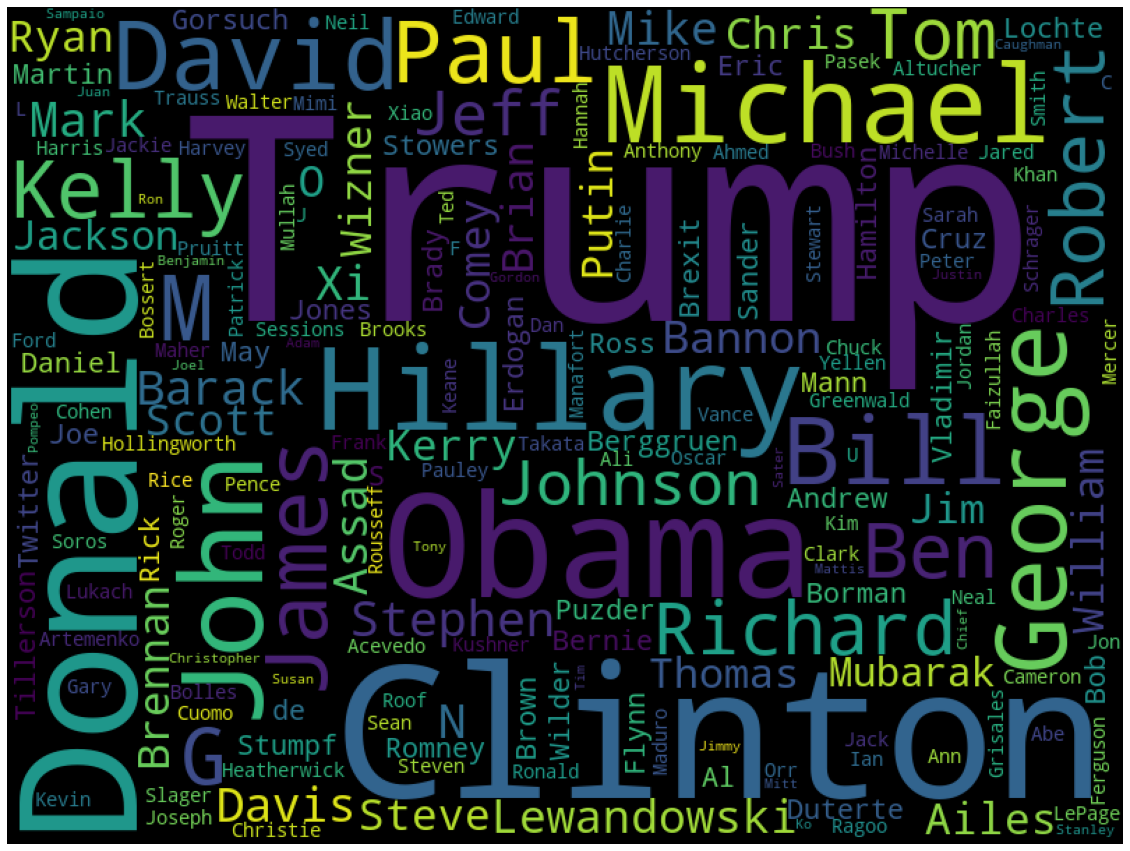

In [9]:
# we only chose a subset of the training data to not crash our computers
truth_string = nlp(' '.join(train_data['text'].where(train_data['label'] == 0)[0:1000].dropna()))

word_cloud_string = ""

for token in truth_string.ents:
  if token.label_ == 'PERSON':
    word_cloud_string += token.text.split(' ')[0] + " "

truth_text_cloud = word_cloud.generate(word_cloud_string)
plt.figure(figsize=(20,30))
plt.imshow(truth_text_cloud)
plt.axis('off')
plt.show()

3. We will train a model to identify fake news and real news in a given dataset / text and compare the results to a pretrained model made my Facebook.

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

train_data['text'] = train_data['text'].apply(lambda x: x.lower())
test_data['text'] = test_data['text'].apply(lambda x: x.lower())

max_length = 1000
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

# train data
tokenizer.fit_on_texts(train_data['text'])
sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequence = pad_sequences(sequences, maxlen=max_length, value=0.0, padding='post')
# train_sequence = pad_sequences(sequences, value=0.0, padding='post')
# train_labels = np.asarray(train_data['label'])
train_labels = tf.keras.utils.to_categorical(train_data['label'], 2)
word_index = tokenizer.word_index

# test data
tokenizer.fit_on_texts(test_data['text'])
sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequence = pad_sequences(sequences, maxlen=max_length, value=0.0, padding='post')
# test_sequence = pad_sequences(sequences, value=0.0, padding='post')
# test_labels = np.asarray(test_data['label'])
# 0 = real, 1 = fake
test_labels = tf.keras.utils.to_categorical(test_data['label'], 2)

x_train = train_sequence
y_train = train_labels
x_test = test_sequence
y_test = test_labels

In [11]:
# Define the model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Bidirectional, LSTM, Dropout
  
model = Sequential()
# model.add(Embedding(num_words, 32, input_length=max_length))
model.add(Embedding(num_words, 32))
# model.add(Flatten())
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [12]:
# import os
# glove_dir = '../data/glove.6B'
  
# embeddings_index = {}
# # use only one of 4 files from the glove vector set
# with open(os.path.join(glove_dir, 'glove.6B.100d.txt'),'rt', encoding='UTF-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

# print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [13]:
# Preparing the GloVe word embeddings matrix
# embedding matrix that we can load into an Embedding layer. It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in our reference word index (built during tokenization). Note that the index 0 isn’t supposed to stand for any word or token—it’s a placeholder.
# embedding_dim = 100
  
# embedding_matrix = np.zeros((num_words, embedding_dim))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if i < num_words:
#         if embedding_vector is not None:
#             # Words not found in embedding index will be all-zeros.
#             embedding_matrix[i] = embedding_vector
# len(embedding_matrix)

10000

In [ ]:
# Define the model
# from keras.models import Sequential
# from keras.layers import Embedding, Flatten, Dense, Bidirectional, LSTM, Dropout

# model = Sequential()
# model.add(Embedding(num_words, embedding_dim, input_length=max_length))
# # model.add(Embedding(num_words, 32, input_length=max_length))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 flatten (Flatten)           (None, 100000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                6400064   
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 7,400,194
Trainable params: 7,400,194
Non-trainable params: 0
_________________________________________________________________


In [15]:
# model.layers[0].set_weights([embedding_matrix])
# model.layers[0].trainable = False

In [16]:
# # early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(x_train, y_train,
#               epochs=5,
#               batch_size=30,
#               shuffle=True,
#               validation_split=0.1,
#               # callbacks=[early_stop]
#               )

Epoch 1/5
549/549 [==============================] - 14s 25ms/step - loss: 0.5055 - accuracy: 0.7481 - val_loss: 0.4027 - val_accuracy: 0.8300
Epoch 2/5
549/549 [==============================] - 13s 24ms/step - loss: 0.2499 - accuracy: 0.9163 - val_loss: 0.3921 - val_accuracy: 0.8245
Epoch 3/5
549/549 [==============================] - 14s 25ms/step - loss: 0.1128 - accuracy: 0.9810 - val_loss: 0.3287 - val_accuracy: 0.8622
Epoch 4/5
549/549 [==============================] - 14s 25ms/step - loss: 0.0505 - accuracy: 0.9983 - val_loss: 0.3288 - val_accuracy: 0.8595
Epoch 5/5
549/549 [==============================] - 13s 23ms/step - loss: 0.0250 - accuracy: 0.9996 - val_loss: 0.3496 - val_accuracy: 0.8639


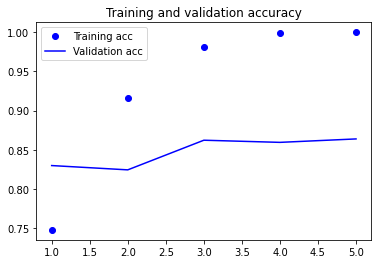

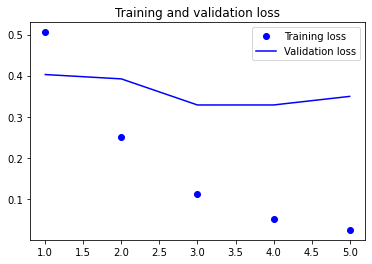

In [17]:
# # Plot performance over time
# import matplotlib.pyplot as plt
  
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# model.evaluate(x_test,y_test) # to beat 71%

143/143 [==============================] - 1s 7ms/step - loss: 0.7984 - accuracy: 0.6787


[0.7984325885772705, 0.6786885261535645]

In [ ]:
# prediction = model.predict(x_test[10:11])
# prediction

array([[0.8305929 , 0.17731693]], dtype=float32)

In [ ]:
model.save('../saved_models')

INFO:tensorflow:Assets written to: ../saved_models\assets


In [ ]:
loaded_model = tf.keras.models.load_model('../saved_models')
loaded_model.evaluate(x_test,y_test)

# prediction = loaded_model.predict(x_test[5:6])
# prediction

143/143 [==============================] - 1s 7ms/step - loss: 0.7984 - accuracy: 0.6787


[0.7984325885772705, 0.6786885261535645]